In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_parquet("modelHistoryAggregate.pq")
# print(df.columns)

df = df.groupby(["EncoderActivation", "TargetClasses", "Epochs", "EncoderLossWeighting", "LatentDimension"]) \
    .aggregate(["mean", "sem"]) \
    .reset_index()

In [17]:
df

EncoderActivation TargetClasses Epochs EncoderLossWeighting  \
                                                                 
0            sigmoid        [0, 1]     10                0.000   
1            sigmoid        [0, 1]     10                0.000   
2            sigmoid        [0, 1]     10                0.000   
3            sigmoid        [0, 1]     10                0.002   
4            sigmoid        [0, 1]     10                0.002   
..               ...           ...    ...                  ...   
73           sigmoid        [0, 1]     10                0.048   
74           sigmoid        [0, 1]     10                0.048   
75           sigmoid        [0, 1]     10                0.050   
76           sigmoid        [0, 1]     10                0.050   
77           sigmoid        [0, 1]     10                0.050   

   LatentDimension TotalLoss           DecoderLoss           EncoderLoss  \
                        mean       sem        mean       sem        mean   
0               16  0.011439  0.000052    0.011439  0.000052    0.374096   
1               64  0.009991  0.000047    0.009991  0.000047    0.360883   
2              128  0.009825  0.000062    0.009825  0.000062    0.335103   
3               16  0.012650  0.000093    0.012198  0.000100    0.225639   
4               64  0.011012  0.000057    0.010684  0.000059    0.163949   
..             ...       ...       ...         ...       ...         ...   
73              64  0.018575  0.000231    0.017712  0.000255    0.017984   
74             128  0.017011  0.000170    0.016362  0.000184    0.013524   
75              16  0.036721  0.005891    0.035880  0.006082    0.016815   
76              64  0.018804  0.000167    0.017936  0.000185    0.017369   
77             128  0.017504  0.000238    0.016856  0.000258    0.012979   

             TotalValidationLoss           DecoderValidationLoss            \
         sem                mean       sem                  mean       sem   
0   0.001230            0.011271  0.000052              0.011271  0.000052   
1   0.001633            0.009939  0.000043              0.009939  0.000043   
2   0.002762            0.009722  0.000057              0.009722  0.000057   
3   0.004357            0.012455  0.000106              0.012000  0.000113   
4   0.001630            0.010855  0.000055              0.010528  0.000057   
..       ...                 ...       ...                   ...       ...   
73  0.000530            0.018158  0.000224              0.017286  0.000252   
74  0.000337            0.016569  0.000177              0.015915  0.000193   
75  0.003961            0.036315  0.005952              0.035479  0.006142   
76  0.000427            0.018370  0.000194              0.017503  0.000214   
77  0.000409            0.017019  0.000241              0.016365  0.000259   

   EncoderValidationLoss            
                    mean       sem  
0               0.376110  0.001281  
1               0.362091  0.001757  
2               0.334915  0.002923  
3               0.227152  0.004172  
4               0.163384  0.001688  
..                   ...       ...  
73              0.018147  0.000593  
74              0.013628  0.000365  
75              0.016712  0.003913  
76              0.017351  0.000454  
77              0.013088  0.000401  

[78 rows x 17 columns]

In [19]:
LATENT_DIMENSIONS_VALS = df["LatentDimension"].unique()
LATENT_DIMENSIONS_VALS.sort()

ENCODER_LOSS_WEIGHTINGS_VALS = df["EncoderLossWeighting"].unique()
ENCODER_LOSS_WEIGHTINGS_VALS.sort()

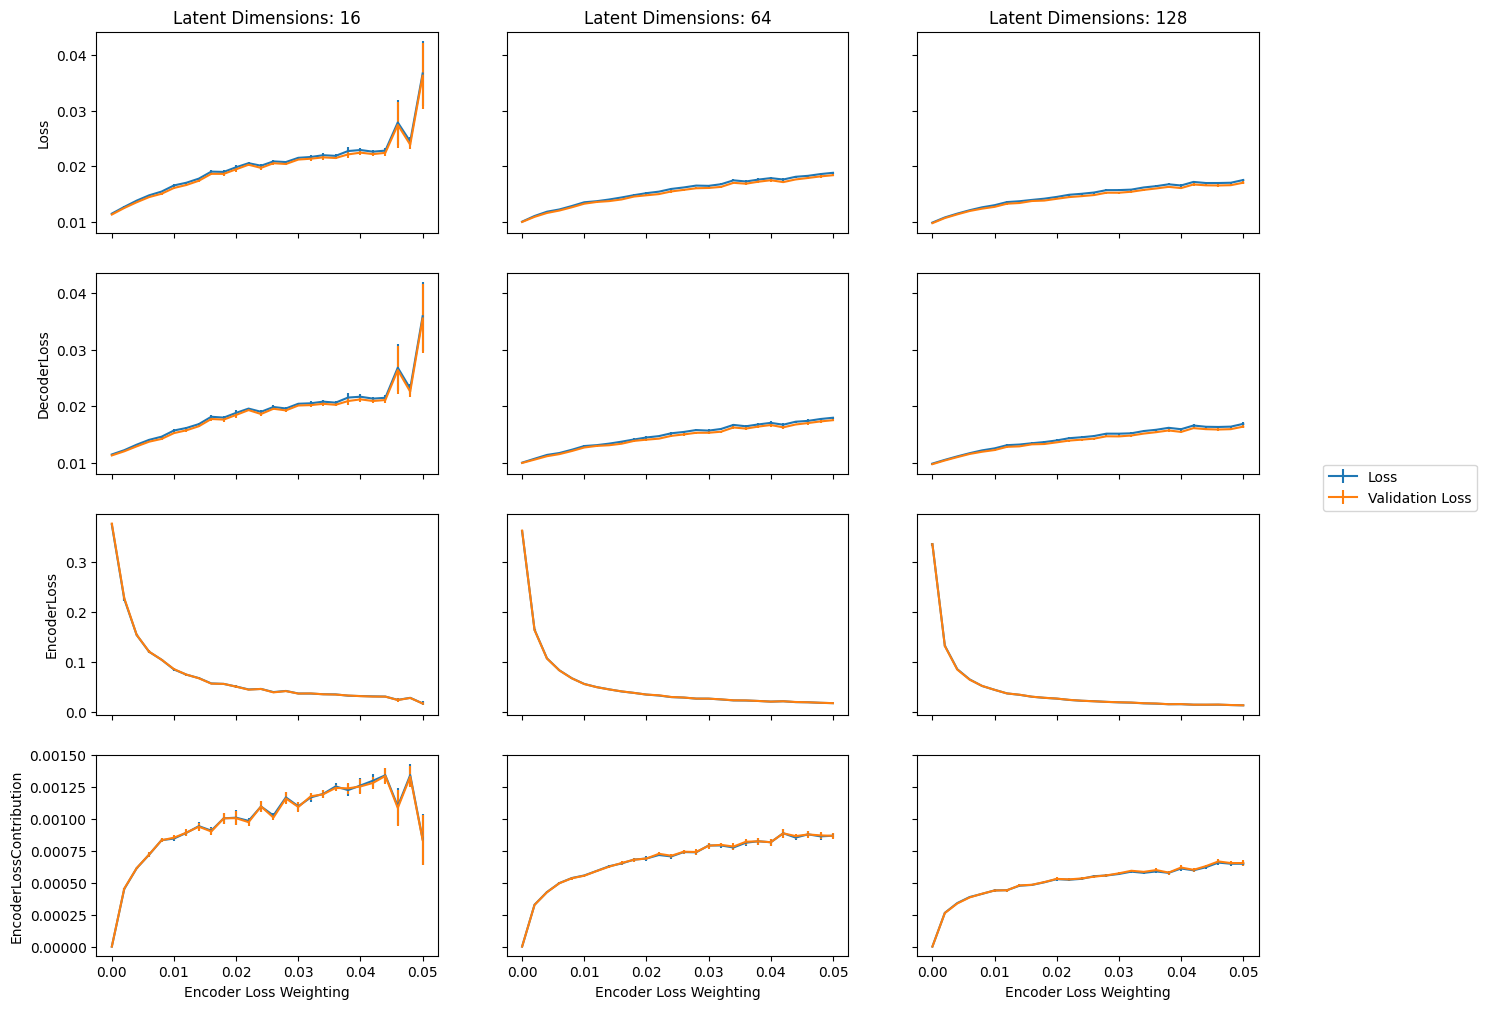

In [55]:
fig, axes = plt.subplots(nrows=4, ncols=len(LATENT_DIMENSIONS_VALS), figsize=(15,12), sharex=True, sharey="row")
basedf = df[(df["EncoderActivation"]=="sigmoid") & (df["TargetClasses"]=="[0, 1]")]

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]

    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], label="Loss")
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], label="Validation Loss")

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[1,:])):
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"])
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"])

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[2,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"])
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"])

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[3,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"])
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"])


for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    ax.set_title(f"Latent Dimensions: {latentDim}")

axes[0, 0].set_ylabel("TotalLoss")
axes[1, 0].set_ylabel("DecoderLoss")
axes[2, 0].set_ylabel("EncoderLoss")
axes[3, 0].set_ylabel("EncoderLossContribution")

for ax in np.ravel(axes[-1, :]):
    ax.set_xlabel("Encoder Loss Weighting")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05,0.5))

# plt.tight_layout()
plt.show()